In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis (EDA)

## Import dataset from CSV file and Explore the Dataset
> 1. Import a dataset as CSV file
> 2. Identify the Key Data attributes and Target column
> 3. Replace missing values in the Data attributes with 0
> 4. Replace missing values in other columns with NaN
> 5. Charts used in EDA:
>    - Heatmap
>    - Histogram
>    - Box chart

In [2]:
mydata = pd.read_csv("predictive_maintenance.csv")

**Dataset - Field details:**
- **Date :** Date of failure (date format: YYYY-MM-DD)
- **Device :** Device Name (non-numeric field)
- **Failure :** Device status - 1 = *Failure* or 0 = *Non-Failure* - **Target variable**
- **Attribue 1 :** Device attribue 1
- **Attribue 2 :** Device attribue 2
- **Attribue 3 :** Device attribue 3
- **Attribue 4 :** Device attribue 4
- **Attribue 5 :** Device attribue 5
- **Attribue 6 :** Device attribue 6
- **Attribue 7 :** Device attribue 7
- **Attribue 8 :** Device attribue 8
- **Attribue 9 :** Device attribue 9

In [3]:
# Display top 10 rows
mydata.head(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [4]:
# Display last 10 rows
mydata.tail(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124484,2015-11-02,W1F0SJJ2,0,47525320,0,0,0,12,357421,0,0,0
124485,2015-11-02,Z1F0GB8A,0,92823192,0,0,0,9,357127,0,0,0
124486,2015-11-02,Z1F0GE1M,0,222878704,0,0,0,10,349826,0,0,0
124487,2015-11-02,Z1F0KJDS,0,79883648,0,0,0,11,358121,0,0,0
124488,2015-11-02,Z1F0KKN4,0,218765712,0,0,0,9,353525,0,0,0
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [6]:
# Checking for non-numeric values
mydata[~mydata.applymap(np.isreal).all(1)]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [7]:
# Checking for NULL values in any column
mydata.isnull().sum()

# Outcome: All fields have non-null values

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [8]:
# Target variable - Unique values data count
mydata.groupby('failure').size()

failure
0    124388
1       106
dtype: int64

> **Above result shows that**
> - Around 0.1% of the dataset has failure = 1, and others have failure = 0
> 
> This is not a balanced dataset.
> 
> Lets filter this dataset to get data only for the devices containing both the values 0 & 1 for failure column

In [9]:
# Get the list of devices with both failure values 0 and 1

device_data = pd.DataFrame(mydata)
failed_devies = device_data[device_data['failure']==1]['device']
print(failed_devies)

4885      S1F0RRB1
6879      S1F0CTDN
8823      W1F0PNA5
11957     W1F13SRV
12668     W1F1230J
            ...   
109927    W1F1CB5E
114251    Z1F0MRPJ
122118    S1F0JGJV
122808    Z1F14BGY
124329    W1F0T0B1
Name: device, Length: 106, dtype: object


In [10]:
# Filter the actual dataset with the above list of devices
myds = pd.merge(device_data, failed_devies, on=['device'])
print(myds)

             date    device  failure  attribute1  attribute2  attribute3  \
0      2015-01-01  S1F023H2        0   141503600           0           0   
1      2015-01-02  S1F023H2        0   161679800           0           0   
2      2015-01-03  S1F023H2        0   182358672           0           0   
3      2015-01-04  S1F023H2        0   204752808           0           0   
4      2015-01-05  S1F023H2        0   226982888           0           0   
...           ...       ...      ...         ...         ...         ...   
10708  2015-06-26  Z1F1VQFY        0   193955488           0           0   
10709  2015-06-27  Z1F1VQFY        0   153482784           0           0   
10710  2015-06-28  Z1F1VQFY        0   155789448           0           0   
10711  2015-06-29  Z1F1VQFY        0    24092712           0           0   
10712  2015-06-30  Z1F1VQFY        1   178051496           0           0   

       attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  
0      

In [11]:
# Target variable - Unique values data count
myds.groupby('failure').size()

failure
0    10607
1      106
dtype: int64

> **Now we filtered the dataset as below**
> - Around 1% of the dataset are classified as 1, and others are classified as 0 - This is again a imbalanced dataset
> - This dataset only contains the devices which have failed, so it will not be appropriate to use this dataset for further analysis

## Find the correlation between attributes using Heatmap

In [12]:
# Check for correlation between the attribute values
corr = mydata.corr()

<AxesSubplot:>

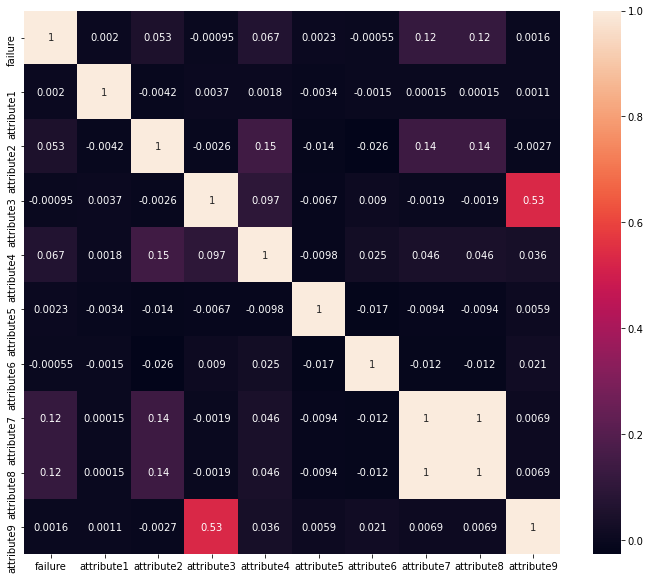

In [13]:
# Display the correlation as Heatmap
plt.subplots(figsize=(12,10)) 
sns.heatmap(corr, annot=True)

> **The above heatmap shows that**
> - None of the attributes have significant correlation between each other
> - Attribute7 and Attribute8 have same data, hence one of these 2 columns can be dropped

In [14]:
mydata = mydata.drop('attribute8', axis=1)
# myds = myds.drop('attribute8', axis=1)

In [15]:
# Column Attribute8 is dropped
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute9  124494 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 10.4+ MB


## Histogram to identify the distribution of Attribute values in the dataset

array([[<AxesSubplot:title={'center':'failure'}>,
        <AxesSubplot:title={'center':'attribute1'}>,
        <AxesSubplot:title={'center':'attribute2'}>],
       [<AxesSubplot:title={'center':'attribute3'}>,
        <AxesSubplot:title={'center':'attribute4'}>,
        <AxesSubplot:title={'center':'attribute5'}>],
       [<AxesSubplot:title={'center':'attribute6'}>,
        <AxesSubplot:title={'center':'attribute7'}>,
        <AxesSubplot:title={'center':'attribute9'}>]], dtype=object)

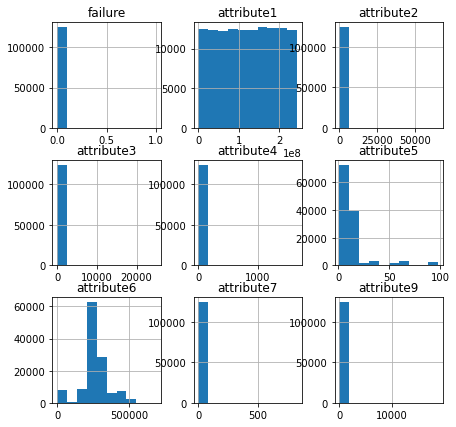

In [16]:
# Histogram for the attributes
mydata.hist(figsize=(7,7))

> From the above Histogram chart, 
> - ATTRIBUTE1 is evenly distributed in the chart
> - ATTRIBUTE6 has a normal distribution
> - ATTRIBUTE2 - 5 & 9 - imbalanced and skewed

## Restructure data grouped by Device Name

In [17]:
device_group = mydata.groupby('device').agg({'failure':'sum', 'attribute1':'mean', 'attribute2':'mean','attribute3':'mean', 'attribute4':'mean', 'attribute5':'mean', 'attribute6':'mean', 'attribute7':'mean', 'attribute9':'mean'})

In [18]:
device_group.head(5)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
device,,,,,,,,,
S1F01085,0,1.159330e+08,56.0,0.0,52.0,6.0,407878.500000,0.0,7.0
S1F013BB,0,1.198783e+08,0.0,0.0,0.0,5.0,689021.000000,0.0,0.0
S1F0166B,0,1.074958e+08,0.0,3.0,0.0,6.0,403549.166667,0.0,0.0
S1F01E6Y,0,1.331127e+08,0.0,0.0,0.0,12.0,254926.604167,0.0,0.0
S1F01JE0,0,1.673001e+08,0.0,0.0,0.0,6.0,410630.833333,0.0,0.0


In [19]:
# updating the column names
device_columns = ['failure', 'attribute1mean','attribute2mean','attribute3mean','attribute4mean','attribute5mean','attribute6mean','attribute7mean','attribute9mean']

device_group = pd.DataFrame(device_group, index = device_group.index)
device_group.columns = device_columns

In [20]:
device_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, S1F01085 to Z1F2PBHX
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   failure         1168 non-null   int64  
 1   attribute1mean  1168 non-null   float64
 2   attribute2mean  1168 non-null   float64
 3   attribute3mean  1168 non-null   float64
 4   attribute4mean  1168 non-null   float64
 5   attribute5mean  1168 non-null   float64
 6   attribute6mean  1168 non-null   float64
 7   attribute7mean  1168 non-null   float64
 8   attribute9mean  1168 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 91.2+ KB


In [21]:
device_group.describe(include='all')

,failure,attribute1mean,attribute2mean,attribute3mean,attribute4mean,attribute5mean,attribute6mean,attribute7mean,attribute9mean
count,1168.000000,1.168000e+03,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.090753,1.231767e+08,501.830716,29.325346,5.760627,12.214346,255836.280307,1.001178,49.191531
std,0.287381,2.114492e+07,4260.625750,736.020157,50.332671,12.361193,98440.570220,10.472889,678.410916
min,0.000000,2.625001e+07,0.000000,0.000000,0.000000,1.000000,9.491525,0.000000,0.000000
25%,0.000000,1.165699e+08,0.000000,0.000000,0.000000,7.000000,208430.170833,0.000000,0.000000
50%,0.000000,1.225641e+08,0.000000,0.000000,0.000000,9.000000,245490.749516,0.000000,0.000000
75%,0.000000,1.287762e+08,0.000000,0.000000,0.000000,12.000000,309632.231771,0.000000,1.000000
max,1.000000,2.104697e+08,64780.444444,24929.000000,1074.000000,98.000000,689021.000000,312.000000,18701.000000


In [22]:
device_group.head(10000)

,failure,attribute1mean,attribute2mean,attribute3mean,attribute4mean,attribute5mean,attribute6mean,attribute7mean,attribute9mean
device,,,,,,,,,
S1F01085,0,1.159330e+08,56.0,0.0,52.0,6.000000,407878.500000,0.0,7.0
S1F013BB,0,1.198783e+08,0.0,0.0,0.0,5.000000,689021.000000,0.0,0.0
S1F0166B,0,1.074958e+08,0.0,3.0,0.0,6.000000,403549.166667,0.0,0.0
S1F01E6Y,0,1.331127e+08,0.0,0.0,0.0,12.000000,254926.604167,0.0,0.0
S1F01JE0,0,1.673001e+08,0.0,0.0,0.0,6.000000,410630.833333,0.0,0.0
...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,0,1.223971e+08,0.0,0.0,0.0,5.000000,222737.729452,0.0,0.0
Z1F1VQFY,1,1.237567e+08,0.0,0.0,0.0,6.328000,249436.960000,0.0,0.0
Z1F26YZB,0,1.205072e+08,0.0,1.0,0.0,1.000000,288869.226190,0.0,0.0


# Building the Model

In [23]:
from sklearn.model_selection import train_test_split

# from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

## Creating the Dataframes for Model Building

In [24]:
# Lets keep 30% of data as the test data size
test_size = 0.3

# Random number as 7
seed=7

# Training data based on the original data from CSV file
csv_X = mydata.drop(["date", "device", "failure"], axis=1)
csv_Y = mydata["failure"]

# Training data based on the device grouping
dg_X = device_group.drop(["failure"], axis=1)
dg_Y = device_group["failure"]

# Model Summary
model_scores = [[]]

## SVM Classifier

### Actual Dataset from CSV

In [25]:
# X = csv_X
# Y = csv_Y
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [26]:
# svc = SVC(kernel='linear')
# svc.fit(X_train, Y_train)
# SVC_predict = svc.predict(X_test)

In [27]:
# svc_score = accuracy_score(X_test , Y_test)
# svc_precision = metrics.precision_score(Y_test, SVC_predict)
# svc_recall = metrics.recall_score(Y_test, SVC_predict)

In [28]:
# print("SVM Classifier Accuracy Score  :",svc_score)
# print("SVM Classifier Precision Score :",svc_precision)
# print("SVM Classifier Recall Score    :",svc_recall)
# print("Confusion Matrix:")
# print(metrics.confusion_matrix(Y_test, svc_predict))

In [29]:
# model_scores=[["SVM Classifier","CSV",svc_score, svc_precision, svc_recall]]

### Device Group Dataset

In [30]:
# X = dg_X
# Y = dg_Y
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [31]:
# dg_svc = SVC(kernel='linear')
# dg_svc.fit(X_train, Y_train)
# dg_SVC_predict = dg_svc.predict(X_test)

In [32]:
# dg_svc_score = accuracy_score(X_test , Y_test)
# dg_svc_precision = metrics.precision_score(Y_test, dg_SVC_predict)
# dg_svc_recall = metrics.recall_score(Y_test, dg_SVC_predict)

In [33]:
# print("SVM Classifier Accuracy Score  :",dg_svc_score)
# print("SVM Classifier Precision Score :",dg_svc_precision)
# print("SVM Classifier Recall Score    :",dg_svc_recall)
# print("Confusion Matrix:")
# print(metrics.confusion_matrix(Y_test, dg_svc_predict))

In [34]:
# model_scores=[["SVM Classifier","Device Group",dg_svc_score, dg_svc_precision, dg_svc_recall]]

## Gradient Boosting

### Actual Dataset from CSV

In [35]:
X = csv_X
Y = csv_Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [36]:
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, Y_train)
gbc1_predict = gbcl.predict(X_test)

In [37]:
gbcl_score = gbcl.score(X_test , Y_test)
gbc1_precision = metrics.precision_score(Y_test, gbc1_predict)
gbc1_recall = metrics.recall_score(Y_test, gbc1_predict)

In [38]:
print("GradientBoost Accuracy   Score:",gbcl_score)
print("Gradient Boost Precision Score:",gbc1_precision)
print("Gradient Boost Recall    Score:",gbc1_recall)
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, gbc1_predict))

GradientBoost Accuracy   Score: 0.9987148250287826
Gradient Boost Precision Score: 0.1111111111111111
Gradient Boost Recall    Score: 0.024390243902439025
Confusion Matrix:
[[37300     8]
 [   40     1]]


In [39]:
model_scores=[["Gradient Boosting","CSV",gbcl_score, gbc1_precision, gbc1_recall]]

### Device Group Dataset

In [40]:
X = dg_X
Y = dg_Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [41]:
dg_gbcl = GradientBoostingClassifier(n_estimators = 50)
dg_gbcl = gbcl.fit(X_train, Y_train)
dg_gbcl_predict = gbcl.predict(X_test)

In [42]:
dg_gbcl_score = dg_gbcl.score(X_test , Y_test)
dg_gbcl_precision = metrics.precision_score(Y_test, dg_gbcl_predict)
dg_gbcl_recall = metrics.recall_score(Y_test, dg_gbcl_predict)

In [43]:
print("GradientBoost Accuracy   Score:",dg_gbcl_score)
print("Gradient Boost Precision Score:",dg_gbcl_precision)
print("Gradient Boost Recall    Score:",dg_gbcl_recall)
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, dg_gbcl_predict))

GradientBoost Accuracy   Score: 0.9202279202279202
Gradient Boost Precision Score: 0.5555555555555556
Gradient Boost Recall    Score: 0.3333333333333333
Confusion Matrix:
[[313   8]
 [ 20  10]]


In [44]:
model_scores.append(["Gradient Boosting","Device Group",dg_gbcl_score, dg_gbcl_precision, dg_gbcl_recall])

## RandomForest

### Actual Dataset from CSV

In [45]:
X = csv_X
Y = csv_Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [46]:
rfcl = RandomForestClassifier(n_estimators = 70)
rfcl = rfcl.fit(X_train, Y_train)
rfcl_predict = rfcl.predict(X_test)

In [47]:
rfcl_score = rfcl.score(X_test , Y_test)
rfcl_precision = metrics.precision_score(Y_test, rfcl_predict)
rfcl_recall = metrics.recall_score(Y_test, rfcl_predict)

In [48]:
print("RandomForest Accuracy Score  :",rfcl_score)
print("RandomForest Precision Score :",rfcl_precision)
print("RandomForest Recall Score    :",rfcl_recall)
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, rfcl_predict))

RandomForest Accuracy Score  : 0.9987951484644837
RandomForest Precision Score : 0.0
RandomForest Recall Score    : 0.0
Confusion Matrix:
[[37304     4]
 [   41     0]]


In [49]:
model_scores.append(["Random Forest","CSV", rfcl_score, rfcl_precision, rfcl_recall])

### Device Group Dataset

In [50]:
X = dg_X
Y = dg_Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [51]:
dg_rfcl = RandomForestClassifier(n_estimators = 70)
dg_rfcl = rfcl.fit(X_train, Y_train)
dg_rfcl_predict = rfcl.predict(X_test)

In [52]:
dg_rfcl_score = dg_rfcl.score(X_test , Y_test)
dg_rfcl_precision = metrics.precision_score(Y_test, dg_rfcl_predict)
dg_rfcl_recall = metrics.recall_score(Y_test, dg_rfcl_predict)

In [53]:
print("RandomForest Accuracy Score  :",dg_rfcl_score)
print("RandomForest Precision Score :",dg_rfcl_precision)
print("RandomForest Recall Score    :",dg_rfcl_recall)
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, dg_rfcl_predict))

RandomForest Accuracy Score  : 0.9202279202279202
RandomForest Precision Score : 0.5454545454545454
RandomForest Recall Score    : 0.4
Confusion Matrix:
[[311  10]
 [ 18  12]]


In [54]:
model_scores.append(["Random Forest","Device Group",dg_rfcl_score, dg_rfcl_precision, dg_rfcl_recall])

# Model Results summary

In [55]:
m_scores = pd.DataFrame(model_scores,columns=["Model","Dataset","Accuracy","Precision","Recall"])
m_scores

,Model,Dataset,Accuracy,Precision,Recall
0,Gradient Boosting,CSV,0.998715,0.111111,0.024390
1,Gradient Boosting,Device Group,0.920228,0.555556,0.333333
2,Random Forest,CSV,0.998795,0.000000,0.000000
3,Random Forest,Device Group,0.920228,0.545455,0.400000
